In [56]:
import py_entitymatching as em

A = em.read_csv_metadata('/Users/yashtrivedi/cs839ps3/A.csv')
A['ID'] = range(0, len(A))
em.set_key(A, 'ID')

B = em.read_csv_metadata('/Users/yashtrivedi/cs839ps3/B.csv')
B['ID'] = range(0, len(B))
em.set_key(B, 'ID')

#print len(A), len(B)
#print A.columns.values
#print B.columns.values

ab = em.AttrEquivalenceBlocker()
C1 = ab.block_tables(A, B, 'club', 'club', 
                     l_output_attrs=['full name', 'club', 'overall'], 
                     r_output_attrs=['full_name', 'club', 'overall'], 
                     n_jobs=-1)

ob = em.OverlapBlocker()
C2 = ob.block_tables(A, B, 'club', 'club', word_level=False,
                     q_val = 3, overlap_size = 2,
                     l_output_attrs=['full name', 'club', 'overall'], 
                     r_output_attrs=['full_name', 'club', 'overall'], 
                     n_jobs=-1)


No handlers could be found for logger "py_entitymatching.io.parsers"
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


In [57]:
print len(C1)
print len(C2)

83686
1683092


In [58]:
dbg = em.debug_blocker(C2, A, B, output_size=200)
dbg.head()

,_id,ltable_ID,rtable_ID,ltable_name,ltable_club,ltable_nation,ltable_league,rtable_name,rtable_club,rtable_nation,rtable_league
0,0,1598,747,aythami artiles,ud las palmas,spain,laliga 1 i 2 i 3,aythami artiles,cordoba cf,spain,laliga 1 i 2 i 3
1,1,3539,1764,alex,salerno,portugal,calcio b,alex,vercelli,portugal,calcio b
2,2,2201,8733,jaime romero,cordoba cf,spain,laliga 1 i 2 i 3,jaime romero,cd lugo,spain,laliga 1 i 2 i 3
3,3,2347,8742,filipe augusto,sl benfica,brazil,super lig,filipe augusto,alanyaspor,brazil,super lig
4,4,1925,967,salvador agra,vila das aves,portugal,laliga 1 i 2 i 3,salvador agra,granada cf,portugal,laliga 1 i 2 i 3


In [59]:
ob = em.OverlapBlocker()
D = ob.block_candset(C2, 'name', 'name', word_level=False, q_val=3, overlap_size=3, n_jobs=-1)

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:18


In [60]:
print len(D)
D

16203


,_id,ltable_ID,rtable_ID,ltable_full name,ltable_club,ltable_overall,rtable_full_name,rtable_club,rtable_overall
0,0,0,0,c. ronaldo dos santos aveiro,real madrid,94,c. ronaldo dos santos aveiro,real madrid cf,94
47,47,2346,0,cristiano da silva,kashiwa reysol,74,c. ronaldo dos santos aveiro,real madrid cf,94
77,77,524,0,roberto soriano,villarreal cf,80,c. ronaldo dos santos aveiro,real madrid cf,94
84,84,583,0,rodrigo moreno machado,valencia cf,80,c. ronaldo dos santos aveiro,real madrid cf,94
120,120,890,0,rodrigo moreno machado,valencia cf,78,c. ronaldo dos santos aveiro,real madrid cf,94
138,138,1025,0,cristian tello herrera,real betis,78,c. ronaldo dos santos aveiro,real madrid cf,94
153,153,1174,0,cristian tello herrera,real betis,77,c. ronaldo dos santos aveiro,real madrid cf,94
175,175,1314,0,rodrigo hernandez cascante,villarreal cf,77,c. ronaldo dos santos aveiro,real madrid cf,94
199,199,3641,0,oscar plano pedreno,r. valladolid cf,72,c. ronaldo dos santos aveiro,real madrid cf,94
222,222,4,1,robert lewandowski,fc bayern munchen,91,robert lewandowski,fc bayern munchen,91


In [61]:
dbg = em.debug_blocker(D, A, B, output_size=200)
dbg.head()

,_id,ltable_ID,rtable_ID,ltable_name,ltable_club,ltable_nation,ltable_league,rtable_name,rtable_club,rtable_nation,rtable_league
0,0,2335,1203,ba,rayo vallecano,senegal,laliga 1 i 2 i 3,abdoulaye ba,rayo vallecano,senegal,laliga 1 i 2 i 3
1,1,1630,9007,de maio,bologna,france,calcio a,sebastian de maio,bologna,france,calcio a
2,2,2635,5999,erdinc,medipol basaksehir fk,turkey,super lig,hakan Özmert,medipol basaksehir fk,turkey,super lig
3,3,2635,1309,erdinc,medipol basaksehir fk,turkey,super lig,tunay torun,medipol basaksehir fk,turkey,super lig
4,4,2633,6300,yeom ki hun,suwon samsung bluewings,korea republic,k league classic,jang ho ik,suwon samsung bluewings,korea republic,k league classic


In [62]:
D.to_csv('/Users/yashtrivedi/cs839ps3/D.csv', index=False)

In [63]:
S = em.sample_table(D, 450)

In [64]:
G = em.label_table(S, label_column_name='gold_labels')
G.to_csv('/Users/yashtrivedi/cs839ps3/G.csv', index=False)

/Users/yashtrivedi/anaconda2/lib/python2.7/site-packages/py_entitymatching/gui/table_gui.py:94: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  table.set_value(idxv[i], cols[j], val)


In [65]:
train_test = em.split_train_test(G, train_proportion=0.7, random_state=0)
I = train_test['train']
J = train_test['test']

I.to_csv('/Users/yashtrivedi/cs839ps3/I.csv', index=False)
J.to_csv('/Users/yashtrivedi/cs839ps3/J.csv', index=False)

In [66]:
feature_table = em.get_features_for_matching(A, B)

The table shows the corresponding attributes along with their respective types.
Please confirm that the information  has been correctly inferred.
If you would like to skip this validation process in the future,
please set the flag validate_inferred_attr_types equal to false.


,Left Attribute,Right Attribute,Left Attribute Type,Right Attribute Type,Example Features
0,name,name,short string (1 word to 5 words),short string (1 word to 5 words),"Jaccard Similarity [3-grams, 3-grams]; Cosine Similarity [Space Delimiter, Space Delimiter]"
1,club,club,short string (1 word to 5 words),short string (1 word to 5 words),"Jaccard Similarity [3-grams, 3-grams]; Cosine Similarity [Space Delimiter, Space Delimiter]"
2,nation,nation,short string (1 word to 5 words),short string (1 word to 5 words),"Jaccard Similarity [3-grams, 3-grams]; Cosine Similarity [Space Delimiter, Space Delimiter]"
3,overall,overall,numeric,numeric,Exact Match; Absolute Norm
4,league,league,short string (1 word to 5 words),short string (1 word to 5 words),"Jaccard Similarity [3-grams, 3-grams]; Cosine Similarity [Space Delimiter, Space Delimiter]"
5,age,age,numeric,numeric,Exact Match; Absolute Norm
6,height,height,numeric,numeric,Exact Match; Absolute Norm
7,reactions,reactions,numeric,numeric,Exact Match; Absolute Norm
8,positioning,positioning,numeric,numeric,Exact Match; Absolute Norm
9,penalties,penalties,numeric,numeric,Exact Match; Absolute Norm


Do you want to proceed? (y/n):y


In [67]:
dt = em.DTMatcher(name='DecisionTree', random_state=0)
svm = em.SVMMatcher(name='SVM', random_state=0)
rf = em.RFMatcher(name='RF', random_state=0)
lg = em.LogRegMatcher(name='LogReg', random_state=0)
ln = em.LinRegMatcher(name='LinReg')
nb = em.NBMatcher(name='NaiveBayes')


In [68]:
H = em.extract_feature_vecs(I,
                            feature_table=feature_table, 
                            attrs_after='gold_labels')

result = em.select_matcher([dt, rf, svm, ln, lg, nb], table=H, 
        exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'],
        k=5, target_attr='gold_labels', 
        metrics_to_display=['precision', 'recall', 'f1'], random_state=0)

result['cv_stats']


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


,Matcher,Average precision,Average recall,Average f1
0,DecisionTree,0.980000,0.957466,0.966746
1,RF,0.980000,1.000000,0.989474
2,SVM,0.896215,0.902564,0.894231
3,LinReg,0.980000,1.000000,0.989474
4,LogReg,0.980000,0.953846,0.964807
5,NaiveBayes,0.980000,0.971429,0.974089


In [69]:
L = em.extract_feature_vecs(J, feature_table=feature_table,
                            attrs_after='gold_labels')

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


In [70]:
nb.fit(table=H, 
       exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
       target_attr='gold_labels')

predictions = nb.predict(table=L, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
              append=True, target_attr='predicted', inplace=False)


In [71]:
eval_result = em.eval_matches(predictions, 'gold_labels', 'predicted')
em.print_eval_summary(eval_result)

Precision : 100.0% (21/21)
Recall : 95.45% (21/22)
F1 : 97.67%
False positives : 0 (out of 21 positive predictions)
False negatives : 1 (out of 114 negative predictions)


In [72]:
dt.fit(table=H, 
       exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
       target_attr='gold_labels')

predictions = dt.predict(table=L, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
              append=True, target_attr='predicted', inplace=False)

eval_result = em.eval_matches(predictions, 'gold_labels', 'predicted')
em.print_eval_summary(eval_result)


Precision : 100.0% (21/21)
Recall : 95.45% (21/22)
F1 : 97.67%
False positives : 0 (out of 21 positive predictions)
False negatives : 1 (out of 114 negative predictions)


In [73]:
svm.fit(table=H, 
       exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
       target_attr='gold_labels')

predictions = svm.predict(table=L, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
              append=True, target_attr='predicted', inplace=False)

eval_result = em.eval_matches(predictions, 'gold_labels', 'predicted')
em.print_eval_summary(eval_result)


Precision : 100.0% (21/21)
Recall : 95.45% (21/22)
F1 : 97.67%
False positives : 0 (out of 21 positive predictions)
False negatives : 1 (out of 114 negative predictions)


In [74]:
rf.fit(table=H, 
       exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
       target_attr='gold_labels')

predictions = rf.predict(table=L, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
              append=True, target_attr='predicted', inplace=False)

eval_result = em.eval_matches(predictions, 'gold_labels', 'predicted')
em.print_eval_summary(eval_result)


Precision : 100.0% (21/21)
Recall : 95.45% (21/22)
F1 : 97.67%
False positives : 0 (out of 21 positive predictions)
False negatives : 1 (out of 114 negative predictions)


In [75]:
lg.fit(table=H, 
       exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
       target_attr='gold_labels')

predictions = lg.predict(table=L, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
              append=True, target_attr='predicted', inplace=False)

eval_result = em.eval_matches(predictions, 'gold_labels', 'predicted')
em.print_eval_summary(eval_result)


Precision : 95.45% (21/22)
Recall : 95.45% (21/22)
F1 : 95.45%
False positives : 1 (out of 22 positive predictions)
False negatives : 1 (out of 113 negative predictions)


In [76]:
ln.fit(table=H, 
       exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
       target_attr='gold_labels')

predictions = ln.predict(table=L, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID', 'gold_labels'], 
              append=True, target_attr='predicted', inplace=False)

eval_result = em.eval_matches(predictions, 'gold_labels', 'predicted')
em.print_eval_summary(eval_result)


Precision : 100.0% (21/21)
Recall : 95.45% (21/22)
F1 : 97.67%
False positives : 0 (out of 21 positive predictions)
False negatives : 1 (out of 114 negative predictions)


In [77]:
M = em.extract_feature_vecs(D, feature_table=feature_table)
predictions = rf.predict(table=M, exclude_attrs=['_id', 'ltable_ID', 'rtable_ID'], 
                          append=True, target_attr='predicted', inplace=False)

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:51


In [78]:
predictions

,_id,ltable_ID,rtable_ID,name_name_jac_qgm_3_qgm_3,name_name_cos_dlm_dc0_dlm_dc0,name_name_jac_dlm_dc0_dlm_dc0,name_name_mel,name_name_lev_dist,name_name_lev_sim,name_name_nmw,...,dribbling_dribbling_lev_sim,stamina_stamina_exm,stamina_stamina_anm,stamina_stamina_lev_dist,stamina_stamina_lev_sim,ID_ID_exm,ID_ID_anm,ID_ID_lev_dist,ID_ID_lev_sim,predicted
0,0,0,0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,17.0,...,1.0,1,1.000000,0.0,1.0,1,0.000000,0.0,1.000000,1
47,47,2346,0,0.500000,0.707107,0.500000,0.905882,8.0,0.529412,1.0,...,0.0,0,0.771739,2.0,0.0,0,0.000000,4.0,0.000000,0
77,77,524,0,0.120000,0.000000,0.000000,0.661064,12.0,0.294118,-5.0,...,0.5,0,0.858696,2.0,0.0,0,0.000000,3.0,0.000000,0
84,84,583,0,0.037037,0.000000,0.000000,0.602801,13.0,0.235294,-6.0,...,0.5,0,0.815217,2.0,0.0,0,0.000000,3.0,0.000000,0
120,120,890,0,0.037037,0.000000,0.000000,0.602801,13.0,0.235294,-6.0,...,0.0,0,0.782609,1.0,0.5,0,0.000000,2.0,0.333333,0
138,138,1025,0,0.346154,0.000000,0.000000,0.868373,6.0,0.647059,8.0,...,0.0,0,0.815217,2.0,0.0,0,0.000000,3.0,0.250000,0
153,153,1174,0,0.346154,0.000000,0.000000,0.868373,6.0,0.647059,8.0,...,0.0,0,0.815217,2.0,0.0,0,0.000000,4.0,0.000000,0
175,175,1314,0,0.037037,0.000000,0.000000,0.602801,13.0,0.235294,-6.0,...,0.0,0,0.728261,2.0,0.0,0,0.000000,4.0,0.000000,0
199,199,3641,0,0.066667,0.000000,0.000000,0.634383,12.0,0.294118,-1.0,...,0.0,0,0.902174,2.0,0.0,0,0.000000,4.0,0.000000,0
222,222,4,1,0.500000,0.707107,0.500000,0.779461,7.0,0.611111,4.0,...,1.0,1,1.000000,0.0,1.0,0,0.250000,1.0,0.000000,1


In [88]:
import pandas as pd
import math

count = 0
matches = list()

match_set = list()

for i in range(len(predictions)):
    if predictions.iloc[i]['predicted'] == 1.0:
        count += 1
        #print A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['full name'] + " === " + B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['full_name']
        
        match = dict()
        
        # New full name
        if len(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['full name']) > len(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['full_name']):
            match['full name'] = str(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['full name']).title()
        else:
            match['full name'] = str(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['full_name']).title()
        
        # New name - names in B contained non-alphabetical characters due to translation from Unicode.
        match['name'] = str(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['name']).title()
            
        # New club
        if len(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['club']) > len(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['club']):
            match['club'] = str(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['club']).title()
        else:
            match['club'] = str(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['club']).title()
        
        # New nation
        if len(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['nation']) > len(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['nation']):
            match['nation'] = str(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['nation']).title()
        else:
            match['nation'] = str(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['nation']).title()
            
        # New overall
        match['overall'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['overall']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['overall'])) / 2)
            
        # New league
        if len(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['league']) > len(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['league']):
            match['league'] = str(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['league']).title()
        else:
            match['league'] = str(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['league']).title()
                               
        # New age
        match['age'] = int(max(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['age']), int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['age'])))
                               
        # New height
        match['height'] = int(max(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['height']), int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['height'])))
                               
        # New reactions
        match['reactions'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['reactions']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['reactions'])) / 2)
        
        # New positioning
        match['positioning'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['positioning']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['positioning'])) / 2)
        
        # New penalties
        match['penalties'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['penalties']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['penalties'])) / 2)
        
        # New long passing
        match['long passing'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['long passing']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['long passing'])) / 2)
                                 
        # New standing tackle
        match['standing tackle'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['standing tackle']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['standing tackle'])) / 2)
                                 
        # New ball control
        match['ball control'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['ball control']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['ball control'])) / 2)
                                 
        # New interceptions
        match['interceptions'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['interceptions']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['interceptions'])) / 2)
                                 
        # New acceleration
        match['acceleration'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['acceleration']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['acceleration'])) / 2)
                                 
        # New marking
        match['marking'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['marking']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['marking'])) / 2)
                                 
        # New strength
        match['strength'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['strength']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['strength'])) / 2)
                                 
        # New pac
        match['pac'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['pac']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['pac'])) / 2)
                                 
        # New aggression
        match['aggression'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['aggression']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['aggression'])) / 2)
                                 
        # New agility
        match['agility'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['agility']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['agility'])) / 2)
                                 
        # New volleys
        match['volleys'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['volleys']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['volleys'])) / 2)
                                 
        # New sprint speed
        match['sprint speed'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['sprint speed']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['sprint speed'])) / 2)
                                 
        # New phy
        match['phy'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['phy']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['phy'])) / 2)
                                 
        # New pas
        match['pas'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['pas']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['pas'])) / 2)
                           
        # New sliding tackle
        match['sliding tackle'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['sliding tackle']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['sliding tackle'])) / 2)
                                 
        # New long shots
        match['long shots'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['long_shots']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['long shots'])) / 2)
                                 
        # New short passing
        match['short passing'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['short passing']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['short passing'])) / 2)
                                 
        # New shot power
        match['shot power'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['shot power']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['shot power'])) / 2)
                                 
        # New curve
        match['curve'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['curve']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['curve'])) / 2)
                                 
        # New dri
        match['dri'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['dri']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['dri'])) / 2)
                                 
        # New jumping
        match['jumping'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['jumping']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['jumping'])) / 2)
                                 
        # New vision
        match['vision'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['vision']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['vision'])) / 2)
                                 
        # New crossing
        match['crossing'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['crossing']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['crossing'])) / 2)
                                 
        # New finishing
        match['finishing'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['finishing']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['finishing'])) / 2)
                                 
        # New balance
        match['balance'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['balance']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['balance'])) / 2)
                                 
        # New heading
        match['heading'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['heading accuracy']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['heading'])) / 2)
                                 
        # New defending
        match['defending'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['defending']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['def'])) / 2)
                                 
        # New sho
        match['sho'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['sho']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['sho'])) / 2)
                                 
        # New free kick accuracy
        match['free kick accuracy'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['free kick accuracy']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['free kick'])) / 2)
                                 
        # New composure
        match['composure'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['composure']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['composure'])) / 2)
                                 
        # New strong foot
        match['strong foot'] = str(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['foot']).title()
                                 
        # New dribbling
        match['dribbling'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['dribbling']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['dribbling'])) / 2)
                                 
        # New stamina
        match['stamina'] = int(math.ceil(int(A.iloc[(int(predictions.iloc[i]['ltable_ID']))]['stamina']) + int(B.iloc[(int(predictions.iloc[i]['rtable_ID']))]['stamina'])) / 2)
        
        matches.append(match)
        
        print type(A.iloc[(int(predictions.iloc[i]['ltable_ID']))])
        match_set.append(pd.concat([A.iloc[(int(predictions.iloc[i]['ltable_ID']))], B.iloc[(int(predictions.iloc[i]['rtable_ID']))]]))
        
print count
print len(match_set)

E = pd.DataFrame(matches)
E


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

,acceleration,age,aggression,agility,balance,ball control,club,composure,crossing,curve,...,short passing,shot power,sliding tackle,sprint speed,stamina,standing tackle,strength,strong foot,vision,volleys
0,89,33,63,89,63,93,Real Madrid Cf,95,85,81,...,83,94,23,91,92,31,80,Right,85,88
1,79,29,80,78,80,89,Fc Bayern Munchen,87,62,77,...,83,88,19,83,79,42,84,Right,78,87
2,75,31,84,79,60,84,Real Madrid Cf,80,66,73,...,78,79,91,77,84,89,81,Right,63,66
3,88,24,48,91,85,93,Juventus,84,82,91,...,86,82,20,84,83,20,65,Left,87,89
4,78,30,50,75,69,85,Juventus,86,68,74,...,75,88,18,80,72,22,85,Right,70,88
5,56,28,60,71,69,89,Real Madrid Cf,85,85,85,...,90,87,69,45,77,82,74,Right,88,82
6,93,27,54,93,91,92,Chelsea,87,80,82,...,86,79,22,87,79,27,65,Right,86,79
7,93,27,55,94,91,93,Chelsea,87,80,82,...,87,79,22,87,81,27,66,Right,87,79
8,94,26,56,96,82,95,Paris Saint-Germain,92,75,81,...,81,80,33,90,78,24,53,Right,80,83
9,88,31,78,86,60,91,Fc Barcelona,83,77,86,...,83,87,38,77,89,45,80,Right,84,88


In [111]:
# E.to_csv('/Users/yashtrivedi/cs839ps4/E.csv', index=False)
final_string = list()
for i in range(len(match_set)):
    final_string.append(match_set[i].tolist())
    
print len(final_string)

import csv

with open('/Users/yashtrivedi/cs839ps4/ABmatches.csv', 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for i in final_string:
        wr.writerow(i)

3575


In [112]:
print A.columns.values
print B.columns.values

['full name' 'name' 'club' 'nation' 'overall' 'league' 'age' 'height'
 'reactions' 'positioning' 'penalties' 'long passing' 'standing tackle'
 'ball control' 'interceptions' 'acceleration' 'marking' 'strength' 'pac'
 'aggression' 'agility' 'volleys' 'sprint speed' 'phy' 'pas'
 'sliding tackle' 'long_shots' 'short passing' 'shot power' 'curve' 'dri'
 'jumping' 'vision' 'crossing' 'finishing' 'balance' 'heading accuracy'
 'defending' 'sho' 'free kick accuracy' 'composure' 'foot' 'dribbling'
 'stamina' 'ID']
['full_name' 'name' 'club' 'nation' 'overall' 'league' 'age' 'height'
 'reactions' 'positioning' 'penalties' 'long passing' 'standing tackle'
 'ball control' 'interceptions' 'acceleration' 'marking' 'strength' 'pac'
 'aggression' 'agility' 'volleys' 'sprint speed' 'phy' 'pas'
 'sliding tackle' 'long shots' 'short passing' 'shot power' 'curve' 'dri'
 'jumping' 'vision' 'crossing' 'finishing' 'balance' 'heading' 'def' 'sho'
 'free kick' 'composure' 'strong foot' 'dribbling' 'stamina' 'I

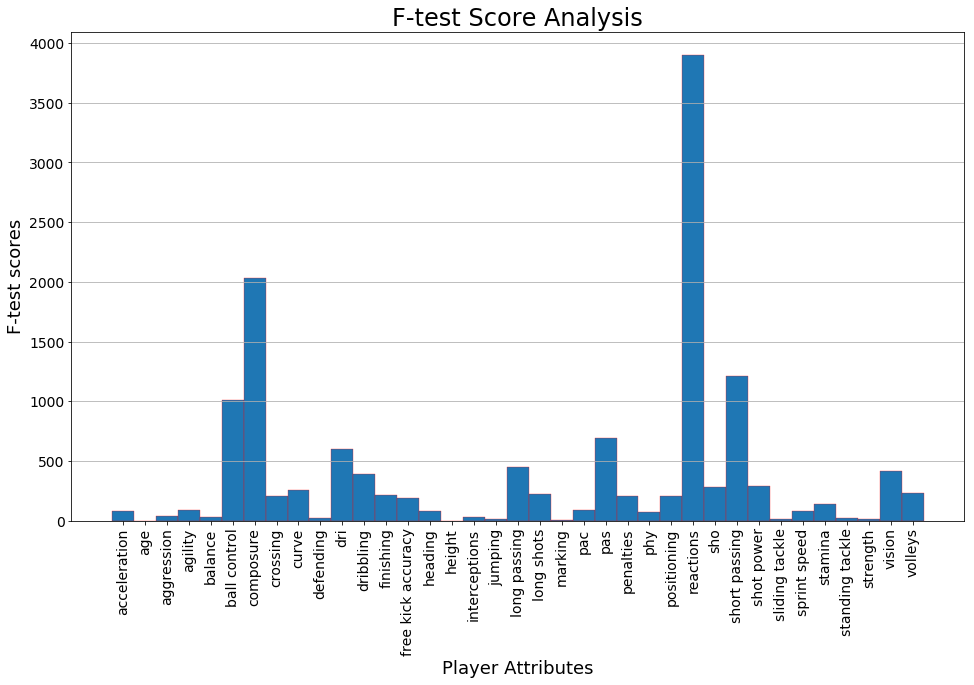

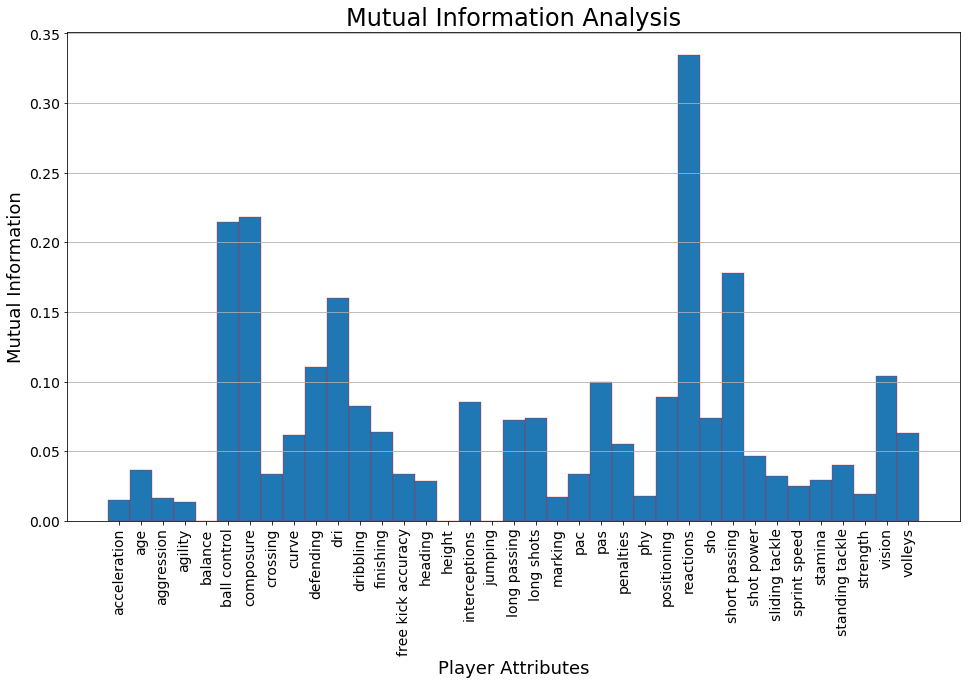

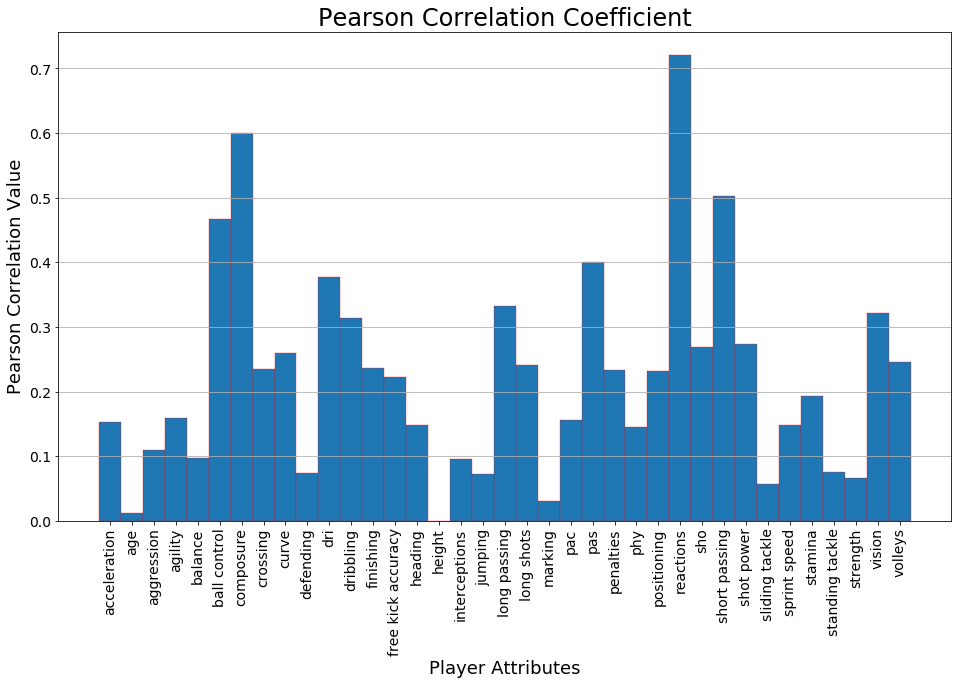

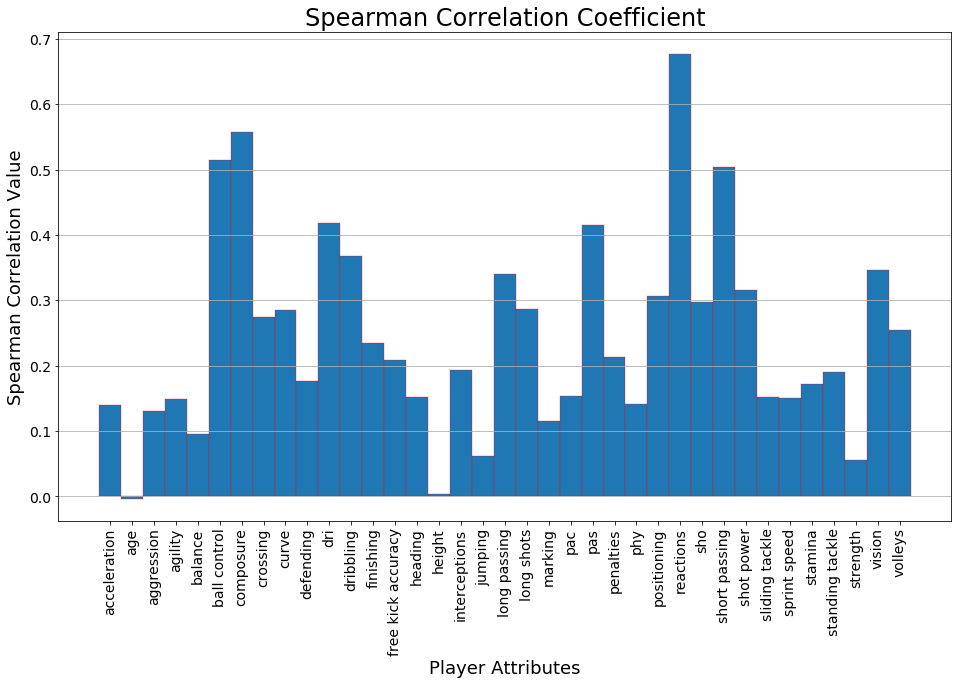

In [45]:
import pandas as pd
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

E = pd.read_csv('/Users/yashtrivedi/cs839ps4/E.csv')

X = E.copy()
X = X.drop(columns=['overall', 'club', 'full name', 'league', 'name', 'nation',
               'strong foot'])
Y = E.loc[:, 'overall']

X = X.astype(int)
Y = Y.astype(int)

F, pval = f_regression(X, Y)
# print X.columns.values, F

x = np.arange(len(X.columns.values))

plt.figure(figsize=(16,9))
plt.title('F-test Score Analysis', fontsize=24)
plt.grid(True, axis='y')
plt.bar(x, F, tick_label=X.columns.values, width=1.0, edgecolor='red', linewidth='0.3')
plt.yticks(fontsize=14)
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Player Attributes', fontsize=18)
plt.ylabel('F-test scores', fontsize=18)
plt.savefig('/Users/yashtrivedi/cs839ps4/f_test_regression.png', bbox_inches='tight', dpi=600)

mi = mutual_info_regression(X, Y)
x = np.arange(len(X.columns.values))

plt.figure(figsize=(16,9))
plt.title('Mutual Information Analysis', fontsize=24)
plt.grid(True, axis='y')
plt.bar(x, mi, tick_label=X.columns.values, width=1.0, edgecolor='red', linewidth='0.3')
plt.yticks(fontsize=14)
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Player Attributes', fontsize=18)
plt.ylabel('Mutual Information', fontsize=18)
plt.savefig('/Users/yashtrivedi/cs839ps4/mutual_info_regression.png', bbox_inches='tight', dpi=600)
# print mi

# svc = SVC(kernel="linear", C=1)
# rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
# rfe.fit(X, Y)
# ranking = rfe.ranking_.reshape(X.iloc[0].shape)

# print ranking

pearson_vals = []
spearman_vals = []
for col in X.columns.values:
    p_cor, p_val_pearson = pearsonr(X.loc[:, col], Y)
    sp_cor, p_val_spearman = spearmanr(X.loc[:, col], Y)
    pearson_vals.append(p_cor)
    spearman_vals.append(sp_cor)
    
# print pearson_vals, len(pearson_vals)
    
plt.figure(figsize=(16,9))
plt.title('Pearson Correlation Coefficient', fontsize=24)
plt.grid(True, axis='y')
plt.bar(x, pearson_vals, tick_label=X.columns.values, width=1.0, edgecolor='red', linewidth='0.3')
plt.yticks(fontsize=14)
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Player Attributes', fontsize=18)
plt.ylabel('Pearson Correlation Value', fontsize=18)
plt.savefig('/Users/yashtrivedi/cs839ps4/pearson_correlation.png', bbox_inches='tight', dpi=600)

plt.figure(figsize=(16,9))
plt.title('Spearman Correlation Coefficient', fontsize=24)
plt.grid(True, axis='y')
plt.bar(x, spearman_vals, tick_label=X.columns.values, width=1.0, edgecolor='red', linewidth='0.3')
plt.yticks(fontsize=14)
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Player Attributes', fontsize=18)
plt.ylabel('Spearman Correlation Value', fontsize=18)
plt.savefig('/Users/yashtrivedi/cs839ps4/spearman_correlation.png', bbox_inches='tight', dpi=600)



In [47]:
import pandas as pd
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

E = pd.read_csv('/Users/yashtrivedi/cs839ps4/E.csv')

X = E.copy()
X = X.drop(columns=['overall', 'club', 'full name', 'league', 'name', 'nation',
               'strong foot'])
Y = E.loc[:, 'overall']

X = X.astype(int)
Y = Y.astype(int)

x = np.arange(len(X.columns.values))

svc = SVC(kernel='linear', C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, Y)
ranking = rfe.ranking_.reshape(X.iloc[0].shape)

print ranking

# plt.matshow(ranking, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.title("Ranking of pixels with RFE")
# plt.show()


[ 6 23 31 16 29  3  2 25 36 18  4  8 14 32 33 11 21 37 26 24 20  5 10 35
 27 12  1 13  9 15 22  7 30 19 28 17 34]


In [49]:
d = dict()

for i in range(len(ranking)):
    d[ranking[i]] = X.columns.values[i]
    
print d

{1: 'reactions', 2: 'composure', 3: 'ball control', 4: 'dri', 5: 'pac', 6: 'acceleration', 7: 'sprint speed', 8: 'dribbling', 9: 'short passing', 10: 'pas', 11: 'height', 12: 'positioning', 13: 'sho', 14: 'finishing', 15: 'shot power', 16: 'agility', 17: 'vision', 18: 'defending', 19: 'standing tackle', 20: 'marking', 21: 'interceptions', 22: 'sliding tackle', 23: 'age', 24: 'long shots', 25: 'crossing', 26: 'long passing', 27: 'phy', 28: 'strength', 29: 'balance', 30: 'stamina', 31: 'aggression', 32: 'free kick accuracy', 33: 'heading', 34: 'volleys', 35: 'penalties', 36: 'curve', 37: 'jumping'}


In [52]:
E.iloc[0]

acceleration                                    89
age                                             33
aggression                                      63
agility                                         89
balance                                         63
ball control                                    93
club                                Real Madrid Cf
composure                                       95
crossing                                        85
curve                                           81
defending                                       33
dri                                             90
dribbling                                       91
finishing                                       94
free kick accuracy                              76
full name             C. Ronaldo Dos Santos Aveiro
heading                                         88
height                                         185
interceptions                                   29
jumping                        